## Imports

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

import statsmodels.api as sm
from scipy import signal
from scipy import stats
import pandas as pd

In [11]:
enso_ts = pd.read_csv('./enso_ond(1).csv')
jet_ts = pd.read_csv('./jet_ond(1).csv')
spv_ts = pd.read_csv('./spv_ond(1).csv')

In [13]:
# Standardize the data (zero mean, unit variance)

ENSO = (enso_ts['enso'] - np.mean(enso_ts['enso'])) / np.std(enso_ts['enso'])
JET = (jet_ts['jet'] - np.mean(jet_ts['jet'])) / np.std(jet_ts['jet'])
SPV = (spv_ts['spv'] - np.mean(spv_ts['spv'])) / np.std(spv_ts['spv'])

from scipy import signal

# Assuming ENSO, JET, SPV are your standardized NumPy arrays from the previous step

# Detrending the standardized data
ENSO_detrended = signal.detrend(ENSO)
JET_detrended = signal.detrend(JET)
SPV_detrended = signal.detrend(SPV)

# If ENSO, JET, SPV are pandas Series from the DataFrames, you can convert them to NumPy arrays as follows:
#ENSO_detrended = signal.detrend(ENSO.values)
#ET_detrended = signal.detrend(JET.values)
#SPV_detrended = signal.detrend(SPV.values)

# Example to print and verify the detrended data
print("Detrended ENSO sample:", ENSO_detrended[:5])
print("Detrended JET sample:", JET_detrended[:5])
print("Detrended SPV sample:", SPV_detrended[:5])


Detrended ENSO sample: [-0.65886546  0.84741166 -0.07658269  0.64324851 -0.811211  ]
Detrended JET sample: [-0.14788254 -0.98349973 -0.72129053 -0.99989776  0.45152022]
Detrended SPV sample: [2.27982732 0.69088251 0.01539778 0.25337314 2.40131051]


In [14]:
# Detrend the data (remove linear trend) . You can use signal.detrend()

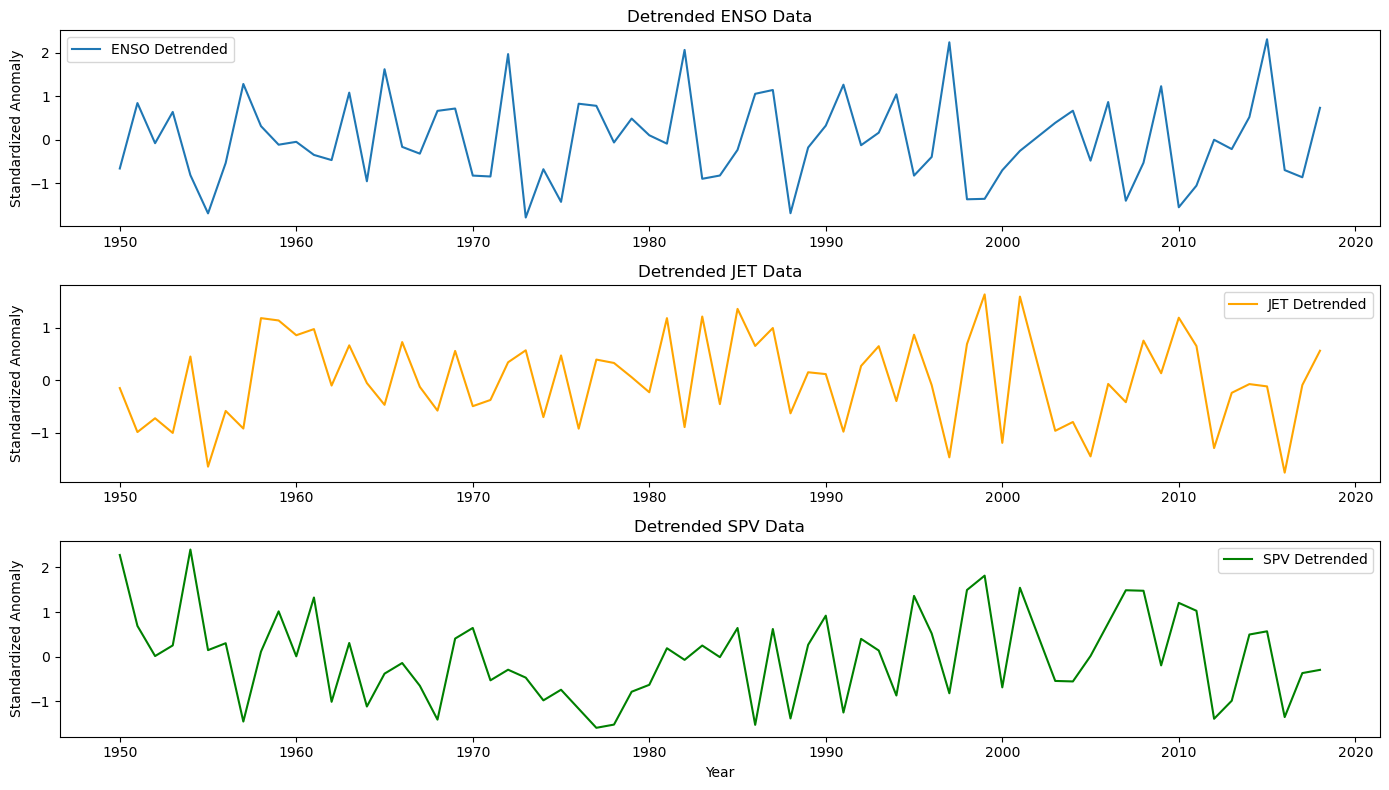

In [15]:
# plot detrended data

import matplotlib.pyplot as plt

years = enso_ts['year'].values  # Extracting the years from any of the loaded DataFrames

# Creating the plots
plt.figure(figsize=(14, 8))

# Plotting ENSO detrended data
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
plt.plot(years, ENSO_detrended, label='ENSO Detrended')
plt.title('Detrended ENSO Data')
plt.ylabel('Standardized Anomaly')
plt.legend()

# Plotting JET detrended data
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
plt.plot(years, JET_detrended, label='JET Detrended', color='orange')
plt.title('Detrended JET Data')
plt.ylabel('Standardized Anomaly')
plt.legend()

# Plotting SPV detrended data
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
plt.plot(years, SPV_detrended, label='SPV Detrended', color='green')
plt.title('Detrended SPV Data')
plt.ylabel('Standardized Anomaly')
plt.xlabel('Year')
plt.legend()

plt.tight_layout()
plt.show()

### Step 3) Data analysis

## EXERCISE (solutions at the end of the notebook)

In [16]:
# for correlation you can use stats.pearsonr()
#======================================================================================
# A. Calculate the Pearson Correlation of MED and DK: is it significant at 0.05 p-value?
#### Calculate the Pearson Correlation of JET and ENSO: is it significant at 0.05 p-value?
#======================================================================================

ENSO = (enso_ts['enso'] - np.mean(enso_ts['enso'])) / np.std(enso_ts['enso'])
JET = (jet_ts['jet'] - np.mean(jet_ts['jet'])) / np.std(jet_ts['jet'])
SPV = (spv_ts['spv'] - np.mean(spv_ts['spv'])) / np.std(spv_ts['spv'])


#Xi = ENSO
#Yi = JET

Xi = JET_detrended 
Yi = ENSO_detrended 

r__dk_enso, p_dk_enso = stats.pearsonr(Xi, Yi)

print(" The correlation of ENSO and JET is ", round(r__dk_enso,3))
print(" p-value is ", round(p_dk_enso, 2))


 The correlation of ENSO and JET is  -0.173
 p-value is  0.16


In [17]:
# for linear regression you can use sm.OLS(Y,X)
#============================================================================
# C. Determine the linear causal effect from NAO --> MED and print the result 
#============================================================================

#X = np.stack([SPV_detrended, ENSO_detrended]).T   #(   ,controlling)
#Y = JET_detrended

X = ENSO_detrended
Y = JET_detrended

model = sm.OLS(Y,X)
results = model.fit()
ce_nao_med = results.params[0]

del(model,results,X,Y)

print("The causal effect of NAO on MED  is ", round(ce_nao_med,4))




The causal effect of NAO on MED  is  -0.1439
